In [1]:
# ✅ 라이브러리 불러오기
from datasets import load_dataset
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
print("✅ 라이브러리 로드 완료")

✅ 라이브러리 로드 완료


In [2]:
# ✅ 데이터 로딩 및 샘플링 (전처리 전에 10만개만 랜덤 추출)
data_pkl_path = Path('./data/full_sample_100k.pkl')
if not data_pkl_path.exists():
    print("🔽 HuggingFace에서 전체 데이터 다운로드 중...")
    dataset = load_dataset("neuralsorcerer/student-performance")
    df_full = dataset['train'].to_pandas()
    df_sampled = df_full.sample(n=100000, random_state=42)  #  전처리 전에 샘플링
    data_pkl_path.parent.mkdir(parents=True, exist_ok=True)
    df_sampled.to_pickle(data_pkl_path)
    print("✅ 10만 개 샘플 저장 완료")
else:
    print("📂 저장된 샘플 데이터 불러오기")
    df_sampled = pd.read_pickle(data_pkl_path)

🔽 HuggingFace에서 전체 데이터 다운로드 중...
✅ 10만 개 샘플 저장 완료


In [3]:
# ✅ 전처리: 필요한 열 선택 및 인코딩
df = df_sampled.copy()
df = df.dropna()

# 범주형 인코딩
label_cols = df.select_dtypes(include='object').columns
label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print(f"✅ 전처리 완료: {df.shape}")

✅ 전처리 완료: (100000, 21)


In [4]:
# ✅ train/test split 및 모델 학습 (수학 점수 예측)
target = 'TestScore_Math'
features = df.columns.drop(target)

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.4f}")

MSE: 31.25
R²: 0.6872


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_17692\1210170463.py:8: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\sksxk\OneDrive\python\noob\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


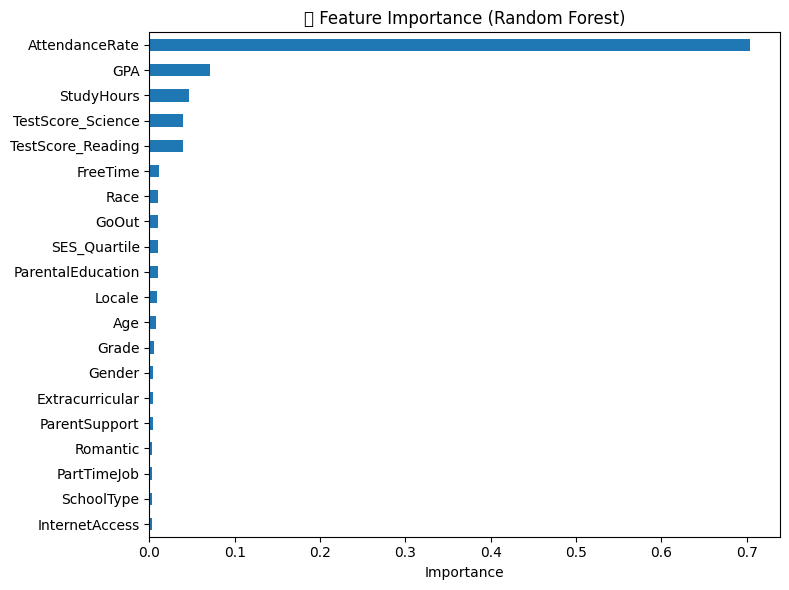

In [5]:
# ✅ 변수 중요도 시각화
importances = pd.Series(model.feature_importances_, index=features)
importances = importances.sort_values(ascending=True)
plt.figure(figsize=(8,6))
importances.plot(kind='barh')
plt.title(" Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()